Identitas Diri       
    Nama : Aditya Herdiansyah Putra    
    NIM  : A11.2021.13948

# Judul

Menguji Kelayakan Air berdasarkan zat yang terkandung dengan metode Klasifikasi.

# Deskripsi


Pada proyek akhir ini, saya akan melakukan pengolahan data berguna untuk menguji kelayakan air berdasarkan zat yang terkandung dengan metode klasifikasi. Pada pengolahan data ini, saya menggunakan dataset yang diambil dari salah satu website yaitu www.kagle.com dengan judul water potability.            

Dataset water potability adalah kumpulan data yang berisi informasi tentang kualitas air dari berbagai sumber air, seperti sungai, danau, atau sumur. Setiap baris dalam dataset ini mewakili satu sampel air dan berisi berbagai atribut yang menggambarkan komposisi kimia air tersebut. Dataset ini biasanya mencakup berbagai parameter dan zat-zat kimia yang mempengaruhi potabilitas air, yaitu kemampuan air tersebut aman dan cocok untuk diminum oleh manusia.       

Dataset ini terdiri dari beberapa atribut dan label yang terdiri dari :        
1. **pH** (Potensi Hidrogen): pH mengukur tingkat keasaman atau alkalinitas suatu larutan.
2. **Hardness** (Kekerasan): Kekerasan air merujuk pada kandungan mineral seperti kalsium dan magnesium.
3. **Solids** (Padatan Terlarut): Konsentrasi padatan terlarut dalam air dapat memberikan wawasan tentang kualitas air. 
4. **Chloramines** (Kloramina): Kloramina adalah senyawa yang dibentuk ketika klorin berikatan dengan amonia dalam air. 
5. **Sulfate** (Sulfat): Konsentrasi sulfat dalam air dapat bermanfaat dalam membangun model yang berhubungan dengan kualitas air atau lingkungan yang terpengaruh oleh sulfat.
6. **Conductivity** (Konduktivitas): Konduktivitas listrik air dapat memberikan informasi tentang jumlah ion dalam air. 
7. **Organic_carbon** (Karbon Organik): Kandungan karbon organik dalam air dapat memberikan wawasan tentang polusi organik. 
8. **Trihalomethanes** (Trihalometana): Trihalometana adalah senyawa yang terbentuk saat klorin bertindak pada materi organik dalam air.
9. **Turbidity** (Kekeruhan): Kekeruhan air menggambarkan sejauh mana partikel padat mengganggu transparansi air.
10. **Potability** (Kemampuan Air Minum): Ini mungkin merupakan target atau label dalam model machine learning. Potability air mengindikasikan apakah air aman untuk diminum. Model dapat dibangun untuk memprediksi potabilitas berdasarkan fitur-fitur lainnya.

# Import Library  
 

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [35]:
# Membaca dataset
data = pd.read_csv("water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Melihat Ukuran Dataset

In [36]:
data.shape

(3276, 10)

# Mengecek Tipe Data

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#  Deskripsi Statistik

In [38]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Pengecekan Missing Value

In [39]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Mengisikan Missing Value dengan Mean

In [40]:
# Menghitung nilai mean dari setiap kolom numerik
mean_values = data.mean()

# Mengisi missing value dengan nilai mean
data_filled = data.fillna(mean_values)

model_data = data_filled.round(1)
model_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.1,204.9,20791.3,7.3,368.5,564.3,10.4,87.0,3.0,0
1,3.7,129.4,18630.1,6.6,333.8,592.9,15.2,56.3,4.5,0
2,8.1,224.2,19909.5,9.3,333.8,418.6,16.9,66.4,3.1,0
3,8.3,214.4,22018.4,8.1,356.9,363.3,18.4,100.3,4.6,0
4,9.1,181.1,17979.0,6.5,310.1,398.4,11.6,32.0,4.1,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.7,193.7,47581.0,7.2,359.9,526.4,13.9,66.7,4.4,1
3272,7.8,193.6,17329.8,8.1,333.8,392.4,19.9,66.4,2.8,1
3273,9.4,175.8,33155.6,7.4,333.8,432.0,11.0,69.8,3.3,1
3274,5.1,230.6,11983.9,6.3,333.8,402.9,11.2,77.5,4.7,1


In [41]:
model_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Pengecekan Jumlah Label yang akan diuji

In [42]:
model_data[model_data["Potability"]==0].shape

(1998, 10)

In [43]:
model_data[model_data["Potability"]==1].shape

(1278, 10)

# Melakukan Standarisasi

In [44]:
# mengecualikan kolom "Potability" dari DataFrame.
df_features = model_data.drop("Potability", axis=1)

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi data fitur
df_features_scaled = scaler.fit_transform(df_features)

# Convert hasil standarisasi fitur kembali ke DataFrame dengan nama kolom
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)

# Menggabungkan fitur yang telah discaling dengan kolom "Potability"
df_scaled = pd.concat([df_features_scaled, data["Potability"]], axis=1)

print("Data setelah standarisasi:")
md = df_scaled.round(1)
md

Data setelah standarisasi:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.0,0.3,-0.1,0.1,1.0,1.7,-1.2,1.3,-1.2,0
1,-2.3,-2.0,-0.4,-0.3,0.0,2.1,0.3,-0.6,0.7,0
2,0.7,0.8,-0.2,1.4,0.0,-0.1,0.8,0.0,-1.1,0
3,0.8,0.5,0.0,0.6,0.6,-0.8,1.2,2.2,0.8,0
4,1.4,-0.5,-0.5,-0.4,-0.7,-0.3,-0.8,-2.2,0.2,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.6,-0.1,2.9,0.0,0.7,1.2,-0.1,0.0,0.6,1
3272,0.5,-0.1,-0.5,0.6,0.0,-0.4,1.7,0.0,-1.5,1
3273,1.6,-0.6,1.3,0.2,0.0,0.1,-1.0,0.2,-0.9,1
3274,-1.3,1.0,-1.1,-0.5,0.0,-0.3,-0.9,0.7,0.9,1


# Uji Akurasi dari Beberapa Metode 

# Metode Naive Bayes
Menguji keakurasian dari dataset Water_Potability.csv dengan menggunakan metode Naive Bayes

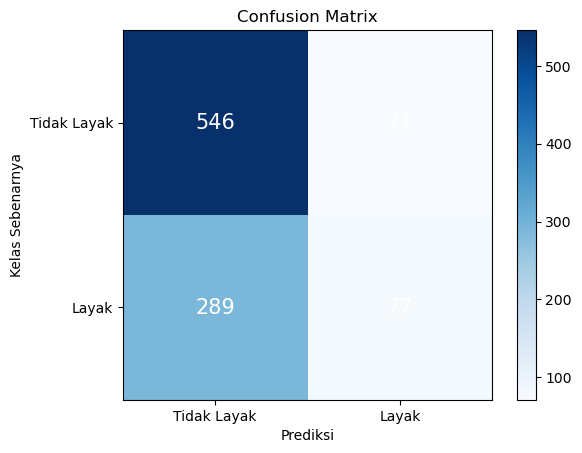

Laporan Klasifikasi:
               precision    recall  f1-score   support

 Tidak Layak       0.65      0.88      0.75       617
       Layak       0.52      0.21      0.30       366

    accuracy                           0.63       983
   macro avg       0.59      0.55      0.53       983
weighted avg       0.60      0.63      0.58       983



In [45]:
from sklearn.naive_bayes import GaussianNB

X = md.drop("Potability",axis=1)
y = md["Potability"]

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat objek klasifikasi Naive Bayes
nb_classifier = GaussianNB()

# Melatih model dengan data latih
nb_classifier.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = nb_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
# Membuat visualisasi confusion matrix
confusion = confusion_matrix(y_test, y_pred)

plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Prediksi')
plt.ylabel('Kelas Sebenarnya')
plt.xticks([0, 1], ['Tidak Layak', 'Layak'])
plt.yticks([0, 1], ['Tidak Layak', 'Layak'])

# Menampilkan angka pada sel matriks
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='white', fontsize=15)

plt.title('Confusion Matrix')
plt.show()

# Membuat visualisasi laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=['Tidak Layak', 'Layak'])
print("Laporan Klasifikasi:\n", report)

# Random Forest
Menguji keakurasian dari dataset Water_Potability.csv dengan menggunakan metode Random Forest

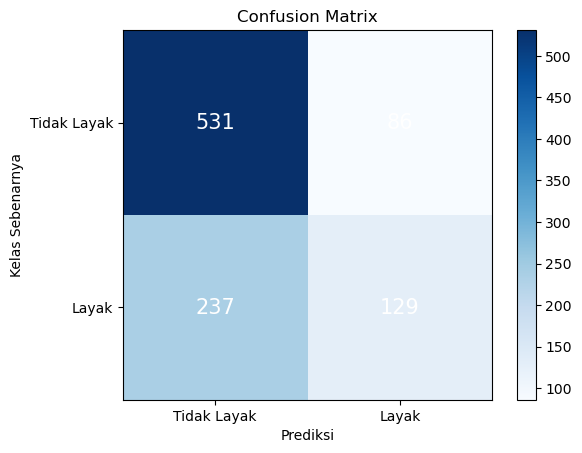

Laporan Klasifikasi:
               precision    recall  f1-score   support

 Tidak Layak       0.69      0.86      0.77       617
       Layak       0.60      0.35      0.44       366

    accuracy                           0.67       983
   macro avg       0.65      0.61      0.61       983
weighted avg       0.66      0.67      0.65       983



In [46]:
from sklearn.ensemble import RandomForestClassifier


X = md.drop("Potability",axis=1)
y = md["Potability"]

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat objek klasifikasi Random Forest
rf_classifier = RandomForestClassifier()

# Melatih model dengan data latih
rf_classifier.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
# Membuat visualisasi confusion matrix
confusion = confusion_matrix(y_test, y_pred)

plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Prediksi')
plt.ylabel('Kelas Sebenarnya')
plt.xticks([0, 1], ['Tidak Layak', 'Layak'])
plt.yticks([0, 1], ['Tidak Layak', 'Layak'])

# Menampilkan angka pada sel matriks
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='white', fontsize=15)

plt.title('Confusion Matrix')
plt.show()

# Membuat visualisasi laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=['Tidak Layak', 'Layak'])
print("Laporan Klasifikasi:\n", report)

# KNN dengan Oversampling

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


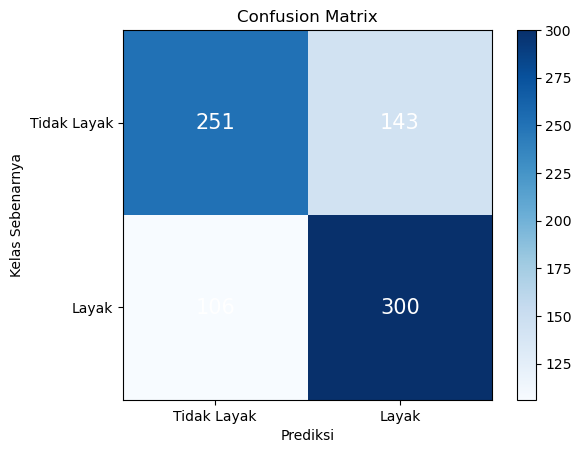

Laporan Klasifikasi:
               precision    recall  f1-score   support

 Tidak Layak       0.70      0.64      0.67       394
       Layak       0.68      0.74      0.71       406

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800



In [47]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

X = md.drop("Potability",axis=1)
y = md["Potability"]

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Membagi dataset yang telah dioversample menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membuat objek klasifikasi KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data latih yang telah dioversample
knn_classifier.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = knn_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat visualisasi confusion matrix
confusion = confusion_matrix(y_test, y_pred)

plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Prediksi')
plt.ylabel('Kelas Sebenarnya')
plt.xticks([0, 1], ['Tidak Layak', 'Layak'])
plt.yticks([0, 1], ['Tidak Layak', 'Layak'])

# Menampilkan angka pada sel matriks
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='white', fontsize=15)

plt.title('Confusion Matrix')
plt.show()

# Membuat visualisasi laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=['Tidak Layak', 'Layak'])
print("Laporan Klasifikasi:\n", report)

# Pemilihan Metode Terbaik
Jika kita amati pada ketiga metode yang saya gunakan untuk menguji keakurasian dari dataset yang saya gunakan yaitu water_potability.csv.            
          
Pada metode pertama saya menggunakan Naive Bayes yang mana menghasilkan tingkat kekurasian 0.63377

Pada metode kedua saya menggunakan Decision Tree yang menghasilkan tingkat ke akurasian 0.68667       
        
Pada metode ketiga saya menggunakan KNN dengan Oversampling yang menghasilkan tingkat keaurasian 0.68875     
     
Dengan begitu, dapat dipastikan bahwa pada machine learning ini akan menggunakan metode ketiga yaitu KNN dengan Oversampling.

# Memprediksi Inputan Baru dengan metode KNN

In [53]:
# Fungsi untuk memprediksi inputan baru
def predict_new_input(input_data):
    # Normalisasi input data
    input_data = np.array(input_data).reshape(1, -1)
    input_data = scaler.transform(input_data)
    # Lakukan prediksi
    prediction = knn_classifier.predict(input_data)
    # Ubah hasil prediksi menjadi "Layak" atau "Tidak Layak"
    result = "Air Layak untuk Dikonsumsi" if prediction[0] == 1 else "Air Tidak layak untuk Dikonsumsi"
    return result

In [54]:
# Uji coba dengan inputan data baru
new_input = [7.1, 204.9, 20791.3, 7.3, 368.5, 564.3, 10.4, 87.0, 3.0]
result = predict_new_input(new_input)
print("Hasil prediksi untuk input baru:", result)
accuracy

Hasil prediksi untuk input baru: Air Layak untuk Dikonsumsi


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.68875

# Menyimpan 

In [51]:
import pickle
pickle.dump(knn_classifier, open('model.pkl', 'wb'))